In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Create data
X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Fit random forest and get training and testing score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.76


In [4]:
# Get feature importance
features = clf.feature_importances_
features = sorted(features, reverse=True)
features

[0.1158815504475693,
 0.07453436567100681,
 0.046968195207630084,
 0.04016023306039871,
 0.04015419428831007,
 0.02810453106050517,
 0.02671949438890684,
 0.026296936194676556,
 0.020110628963464387,
 0.019573634675624618,
 0.018921281851285745,
 0.018681997086357732,
 0.018066327060667305,
 0.017703720304657826,
 0.017636404647630513,
 0.01714386509283848,
 0.016998606261999376,
 0.016960034144608605,
 0.016458478311831958,
 0.016377343955939976,
 0.01630978957701258,
 0.01628945845280057,
 0.015945977856005877,
 0.01570844603864723,
 0.015285821814690117,
 0.015174318512632594,
 0.01460334733652032,
 0.014491512658113572,
 0.014135826569021704,
 0.014119431734667906,
 0.014052668031241049,
 0.01371403428948819,
 0.013012551791774322,
 0.012919788025217064,
 0.012845830273989362,
 0.01283269279005332,
 0.012818787278565922,
 0.012356420001611843,
 0.012210537554674931,
 0.012105068091378193,
 0.011722456709341996,
 0.011661082848989113,
 0.011611943598024149,
 0.011077225569599478,
 0

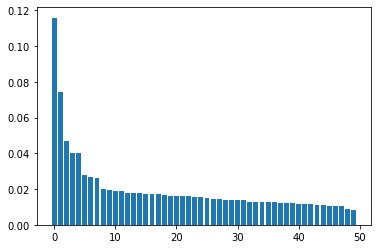

In [5]:
# Note the "noisy" features
plt.bar(x = range(len(features)), height=features)
plt.show()

In [6]:
# Use SelectFromModel to only get the important features
from sklearn.feature_selection import SelectFromModel

# create selection object by passing in the model fitted above
# Note, the original model MUST be one that has a feature_importances_ or coef_
sel = SelectFromModel(clf)

In [7]:
# Fit selection object to the training set
sel.fit(X_train_scaled, y_train)

# Displays an array indicating whether given feature is important
sel.get_support()

array([False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False])

In [8]:
# Retrain entire model on just selected features by transforming features
# Using the sklearn selection object
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the data
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [9]:
# Let's see how logistic regression does with the non-selected dataset
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.68


In [ ]:
# Now let's see it with selected dataset
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')